<a href="https://colab.research.google.com/github/Landecrispim/DATA_MINDS_Desafio/blob/main/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

In [39]:
colun = []
for x  in range(1,22):
  colun.append("X"+str(x))

colun

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21']

In [40]:
df = pd.read_table('/content/german.data',delimiter=' ',header=None)
df.columns = colun

In [41]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [42]:
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
    res = pd.DataFrame({'values': x.unique(), 'n': contagem, 'perc': percentual})
    if plot:
        sns.countplot(x)
        plt.show()
    return res

In [43]:
(df['X21'].value_counts() / df.shape[0]) * 100


1    70.0
2    30.0
Name: X21, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


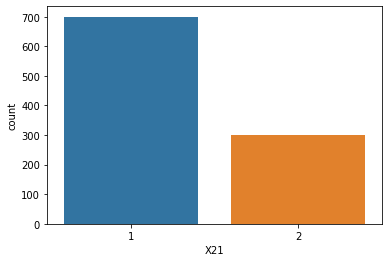

,values,n,perc
1,1,700,70.0
2,2,300,30.0


In [44]:
freq(df['X21'], plot=True)

In [45]:
df.describe()

,X2,X5,X8,X11,X13,X16,X18,X21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [48]:
modelo = smf.glm(formula='X21 ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19 + X20 ', data=df,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    X21   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      951
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Tue, 14 Feb 2023   Deviance:                       24761.
Time:                        23:51:35   Pearson chi2:                 1.46e+18
No. Iterations:                    58                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.455e+17    2.9e+07   5.03e+09      

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +


In [49]:
print(np.exp(modelo.params[1:]))


X1[T.A12]      0.0
X1[T.A13]      0.0
X1[T.A14]      0.0
X3[T.A31]      0.0
X3[T.A32]      0.0
X3[T.A33]      0.0
X3[T.A34]      0.0
X4[T.A41]      0.0
X4[T.A410]     0.0
X4[T.A42]      0.0
X4[T.A43]      0.0
X4[T.A44]      0.0
X4[T.A45]      0.0
X4[T.A46]      inf
X4[T.A48]      0.0
X4[T.A49]      0.0
X6[T.A62]      0.0
X6[T.A63]      0.0
X6[T.A64]      0.0
X6[T.A65]      0.0
X7[T.A72]      inf
X7[T.A73]      0.0
X7[T.A74]      0.0
X7[T.A75]      0.0
X9[T.A92]      0.0
X9[T.A93]      0.0
X9[T.A94]      0.0
X10[T.A102]    inf
X10[T.A103]    0.0
X12[T.A122]    inf
X12[T.A123]    inf
X12[T.A124]    inf
X14[T.A142]    inf
X14[T.A143]    0.0
X15[T.A152]    0.0
X15[T.A153]    0.0
X17[T.A172]    inf
X17[T.A173]    inf
X17[T.A174]    inf
X19[T.A192]    0.0
X20[T.A202]    0.0
X2             inf
X5             inf
X8             inf
X11            0.0
X13            0.0
X16            inf
X18            inf
dtype: float64


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
(np.exp(modelo.params[1:]) - 1) * 100


X1[T.A12]     -100.0
X1[T.A13]     -100.0
X1[T.A14]     -100.0
X3[T.A31]     -100.0
X3[T.A32]     -100.0
X3[T.A33]     -100.0
X3[T.A34]     -100.0
X4[T.A41]     -100.0
X4[T.A410]    -100.0
X4[T.A42]     -100.0
X4[T.A43]     -100.0
X4[T.A44]     -100.0
X4[T.A45]     -100.0
X4[T.A46]        inf
X4[T.A48]     -100.0
X4[T.A49]     -100.0
X6[T.A62]     -100.0
X6[T.A63]     -100.0
X6[T.A64]     -100.0
X6[T.A65]     -100.0
X7[T.A72]        inf
X7[T.A73]     -100.0
X7[T.A74]     -100.0
X7[T.A75]     -100.0
X9[T.A92]     -100.0
X9[T.A93]     -100.0
X9[T.A94]     -100.0
X10[T.A102]      inf
X10[T.A103]   -100.0
X12[T.A122]      inf
X12[T.A123]      inf
X12[T.A124]      inf
X14[T.A142]      inf
X14[T.A143]   -100.0
X15[T.A152]   -100.0
X15[T.A153]   -100.0
X17[T.A172]      inf
X17[T.A173]      inf
X17[T.A174]      inf
X19[T.A192]   -100.0
X20[T.A202]   -100.0
X2               inf
X5               inf
X8               inf
X11           -100.0
X13           -100.0
X16              inf
X18          

In [52]:
model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = df.dropna()
y = baseline_df.X21
X = pd.get_dummies(baseline_df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20']], drop_first=True)
print(X)

     X2    X5  X8  X11  X13  X16  X18  X1_A12  X1_A13  X1_A14  ...  X12_A124  \
0     6  1169   4    4   67    2    1       0       0       0  ...         0   
1    48  5951   2    2   22    1    1       1       0       0  ...         0   
2    12  2096   2    3   49    1    2       0       0       1  ...         0   
3    42  7882   2    4   45    1    2       0       0       0  ...         0   
4    24  4870   3    4   53    2    2       0       0       0  ...         1   
..   ..   ...  ..  ...  ...  ...  ...     ...     ...     ...  ...       ...   
995  12  1736   3    4   31    1    1       0       0       1  ...         0   
996  30  3857   4    4   40    1    1       0       0       0  ...         0   
997  12   804   4    4   38    1    1       0       0       1  ...         0   
998  45  1845   4    4   23    1    1       0       0       0  ...         1   
999  45  4576   3    4   27    1    1       1       0       0  ...         0   

     X14_A142  X14_A143  X15_A152  X15_

In [53]:
model.fit(X, y)


LogisticRegression(penalty='none', solver='newton-cg')

In [54]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty='none', solver='newton-cg')

In [55]:
print(model.coef_)

[[ 2.78633262e-02  1.28274708e-04  3.30089852e-01  4.77609790e-03
  -1.45354814e-02  2.72076121e-01  2.64671400e-01 -3.74853306e-01
  -9.65676757e-01 -1.71188797e+00  1.43378030e-01 -5.86113154e-01
  -8.53161142e-01 -1.43577133e+00 -1.66646712e+00 -1.48878682e+00
  -7.91610440e-01 -8.91583456e-01 -5.22783231e-01 -2.16396017e-01
   3.62837474e-02 -2.05943335e+00 -7.40086852e-01 -3.57740643e-01
  -3.76072881e-01 -1.33919857e+00 -9.46689170e-01 -6.69100307e-02
  -1.82830561e-01 -8.31001567e-01 -2.76624448e-01 -2.75454418e-01
  -8.16077550e-01 -3.67071478e-01  4.36047674e-01 -9.78615842e-01
   2.81438567e-01  1.94534921e-01  7.30448630e-01 -1.23200426e-01
  -6.46328507e-01 -4.43620988e-01 -6.83860902e-01  5.36130307e-01
   5.54717403e-01  4.79475216e-01 -3.00008050e-01 -1.39221591e+00]]


In [58]:
yhat = model.predict_proba(X)
yhat = yhat[:, 1]

In [60]:
confusion_matrix(y, model.predict(X)) # usando a função do sklearn
pd.crosstab(y, model.predict(X))  # fazendo "na mão"


col_0,1,2
X21,,
1,626,74
2,140,160


In [62]:
acuracia = accuracy_score(y, model.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)


O modelo obteve 0.7860 de acurácia.


In [63]:
print(classification_report(y, model.predict(X)))


              precision    recall  f1-score   support

           1       0.82      0.89      0.85       700
           2       0.68      0.53      0.60       300

    accuracy                           0.79      1000
   macro avg       0.75      0.71      0.73      1000
weighted avg       0.78      0.79      0.78      1000



In [51]:
asd = str()
for x in colun:
  asd = asd + "'" + x + "'" + ", "
asd

"'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', "

In [64]:
print('AUC: %0.2f' % roc_auc_score(y, yhat))


AUC: 0.83
